In [29]:
import sys
!{sys.executable} -m pip install deap

In [30]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('./cm1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train[:, individual]
    X_test_ordered = X_test[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered[:, :3]
    X_test_selected = X_test_ordered[:, :3]
    
    clf = SVC(probability=True)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg 	min 	max 
0  	50    	0.88	0.88	0.88
1  	36    	0.88	0.88	0.88
2  	39    	0.88	0.88	0.88
3  	38    	0.88	0.88	0.88
4  	39    	0.88	0.88	0.88
5  	31    	0.88	0.88	0.88
6  	43    	0.88	0.88	0.88
7  	42    	0.88	0.88	0.88
8  	35    	0.88	0.88	0.88
9  	34    	0.88	0.88	0.88
10 	35    	0.88	0.88	0.88
11 	44    	0.88	0.88	0.88
12 	38    	0.88	0.88	0.88
13 	37    	0.88	0.88	0.88
14 	43    	0.88	0.88	0.88
15 	37    	0.88	0.88	0.88
16 	41    	0.88	0.88	0.88
17 	37    	0.88	0.88	0.88
18 	31    	0.88	0.88	0.88
19 	40    	0.88	0.88	0.88
20 	41    	0.88	0.88	0.88


([[1, 16, 17, 9, 7, 14, 5, 10, 12, 0, 8, 11, 18, 3, 4, 13, 20, 19, 6, 15, 2],
  [19, 1, 13, 12, 15, 0, 4, 2, 11, 5, 9, 8, 16, 3, 6, 10, 20, 17, 18, 7, 14],
  [19, 9, 13, 11, 15, 8, 0, 10, 20, 18, 6, 14, 17, 5, 1, 12, 4, 7, 16, 3, 2],
  [12, 11, 13, 19, 4, 16, 2, 5, 18, 3, 1, 6, 7, 9, 15, 8, 20, 17, 14, 0, 10],
  [1, 18, 17, 8, 15, 5, 6, 2, 11, 14, 9, 12, 16, 3, 0, 10, 20, 19, 4, 7, 13],
  [1, 11, 15, 18, 20, 5, 10, 7, 2, 19, 13, 0, 6, 12, 8, 14, 17, 3, 4, 16, 9],
  [12, 16, 7, 13, 0, 11, 14, 8, 5, 3, 19, 18, 9, 6, 20, 2, 1, 4, 10, 17, 15],
  [9, 4, 17, 1, 7, 8, 10, 20, 16, 13, 5, 19, 18, 0, 11, 12, 15, 14, 3, 6, 2],
  [17, 1, 9, 6, 2, 12, 4, 8, 20, 0, 13, 16, 5, 15, 14, 7, 18, 3, 19, 11, 10],
  [0, 7, 11, 15, 19, 18, 16, 4, 2, 10, 17, 20, 14, 8, 6, 12, 9, 5, 3, 1, 13],
  [6, 17, 16, 3, 8, 1, 18, 19, 4, 11, 2, 12, 9, 0, 14, 20, 13, 10, 7, 15, 5],
  [8, 3, 2, 10, 4, 19, 20, 16, 9, 13, 12, 5, 17, 11, 18, 14, 1, 6, 15, 0, 7],
  [17, 5, 1, 18, 15, 16, 2, 20, 11, 10, 9, 12, 4, 3, 0, 14, 7, 1

Best ranked features:  [12, 5, 8]
Accuracy:  0.88
              precision    recall  f1-score   support

       False       0.88      1.00      0.94        88
        True       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100



/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benardcharumbira/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

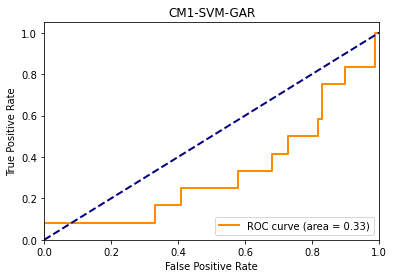

In [39]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = SVC(probability=True)
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/CM1/CM1_SVM_GAR.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CM1-SVM-GAR')
plt.legend(loc="lower right")
plt.show()
